### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Defining some useful functions

In [3]:
def conv(A : np.ndarray, b : np.ndarray, stride = 1):
    w_a = A.shape[1]
    w_b = b.shape[1]
    h_a = A.shape[0]
    h_b = b.shape[0]

    # creating final matrix
    l = math.ceil((h_a + 1 - h_b)/stride)
    m = math.ceil((w_a + 1 - w_b)/stride)
    ans = np.empty((l,m))

    # filling final matrix
    i_idx = 0
    j_idx = 0
    for i in range(0,h_a + 1 - h_b,stride):
        for j in range(0,w_a + 1 - w_b,stride):
            ans[i_idx,j_idx] = np.multiply(A[i:i+h_b,j:j+w_b],b).sum()
            j_idx += 1
        j_idx = 0
        i_idx += 1

    return ans

def make_gauss_kernel(k, s):
    # make a (2k+1)x(2k+1) gaussian blur kernel
    ans = np.empty((2*k+1, 2*k+1))

    for i in range(0,2*k+1):
        for j in range(0,2*k+1):
            ans[i,j] = np.exp((- (i - k - 1)**2 - (j - k - 1)**2)/(2*s*s))/(2*s*np.pi)
    
    return ans

def ReLU(A : np.ndarray):
    return np.where(A < 0, 0, A)

def apply(img : np.ndarray, fltr : np.ndarray, stride = 1):
    ans = ReLU(conv(img[:, :, 0], fltr, stride))
    ans += ReLU(conv(img[:,:,1], fltr, stride))
    ans += ReLU(conv(img[:,:,2], fltr, stride))
    return ans

Reading Image into a numpy array named **img**

In [4]:
img = plt.imread('mario.png')
img.size, img.shape, img.ndim

(460320, (274, 560, 3), 3)

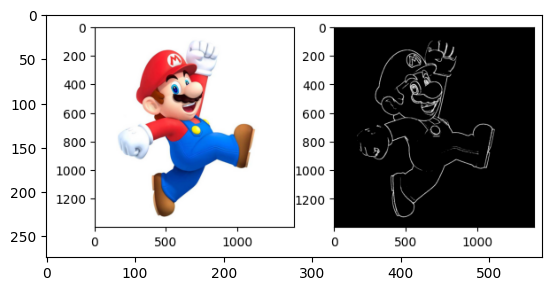

In [5]:
plt.imshow(img);

In [6]:
width = img.shape[1]
height = img.shape[0]

Since the image has axes and output also, so we want to crop and keep the mario image only.<br>
let us try 10% to 40% width and 20% to 70% height

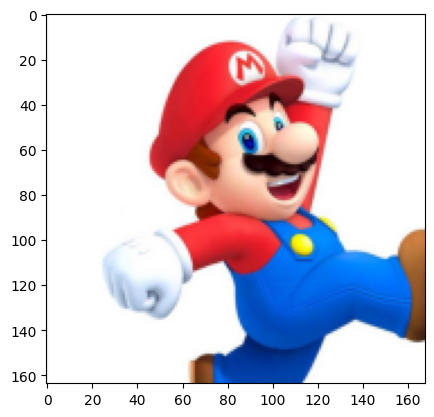

In [7]:
plt.imshow(img[math.ceil(height/10):math.ceil(7*height/10), math.ceil(width/10):math.ceil(4*width/10), :]);

Finally correcting the edges and making it a square matrix.

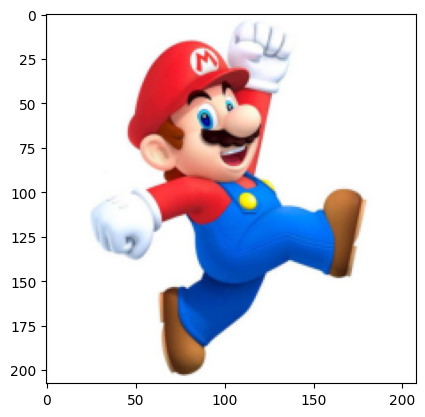

In [8]:
plt.imshow(img[math.ceil(0.09*height):math.ceil(0.85*height), math.ceil(0.1*width):math.ceil(0.45*width)+12, :]);

In [9]:
img = img[math.ceil(0.09*height):math.ceil(0.85*height), math.ceil(0.1*width):math.ceil(0.45*width)+12, :]
img.shape

(208, 208, 3)

### Axial Edge Detectors

Let us apply basic convolution of the left edge detector filter on each channel:<br>1 0 -1<br>1 0 -1<br>1 0 -1

In [10]:
fltr1 = np.array([[1, 0, -1]]*3)
fltr1

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

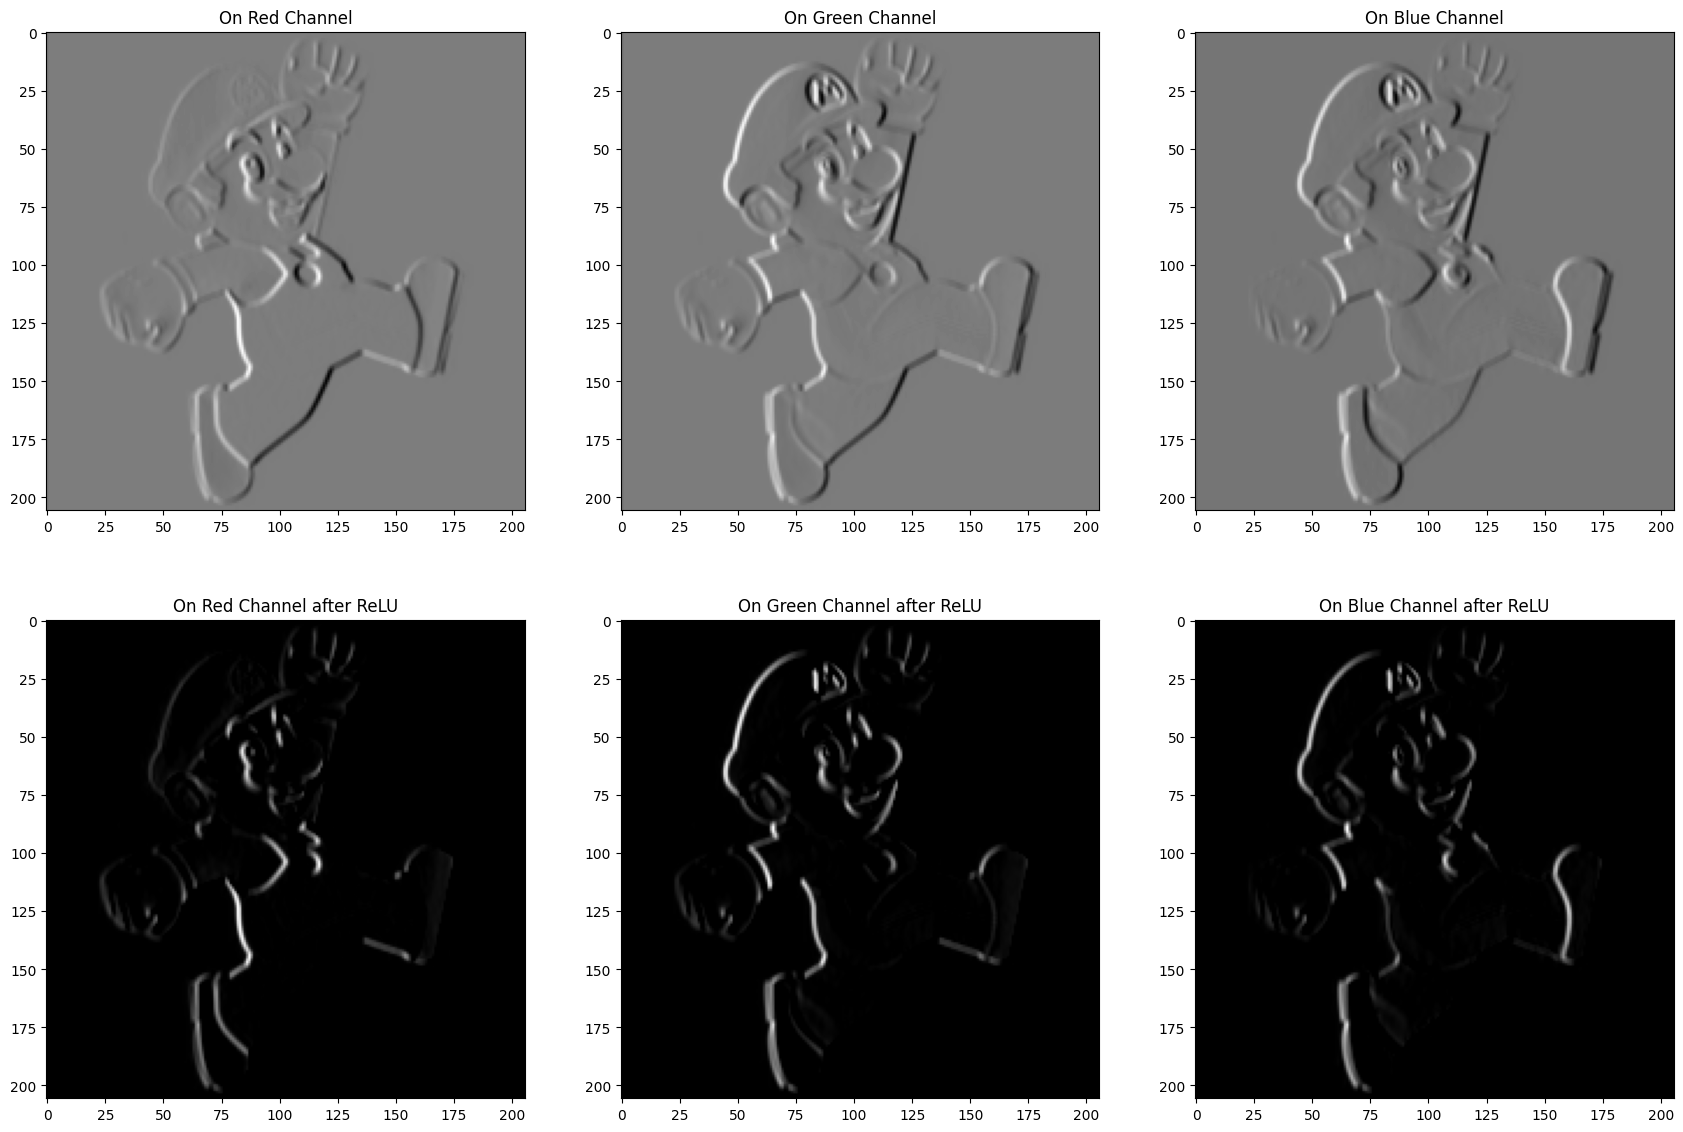

In [11]:
plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
plt.imshow(conv(img[:, :, 0], fltr1), cmap='gray');
plt.title('On Red Channel')

plt.subplot(2,3,2)
plt.imshow(conv(img[:, :, 1], fltr1), cmap='gray');
plt.title('On Green Channel')

plt.subplot(2,3,3)
plt.imshow(conv(img[:, :, 2], fltr1), cmap='gray');
plt.title('On Blue Channel');

# after ReLU
plt.subplot(2,3,4)
plt.imshow(ReLU(conv(img[:, :, 0], fltr1)), cmap='gray');
plt.title('On Red Channel after ReLU')

plt.subplot(2,3,5)
plt.imshow(ReLU(conv(img[:, :, 1], fltr1)), cmap='gray');
plt.title('On Green Channel after ReLU')

plt.subplot(2,3,6)
plt.imshow(ReLU(conv(img[:, :, 2], fltr1)), cmap='gray');
plt.title('On Blue Channel after ReLU');

Similarly we can apply right edge detector : <br>-1 0 1<br>-1 0 1<br>-1 0 1

In [12]:
fltr2 = np.array([[-1, 0, 1]]*3)
fltr2

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

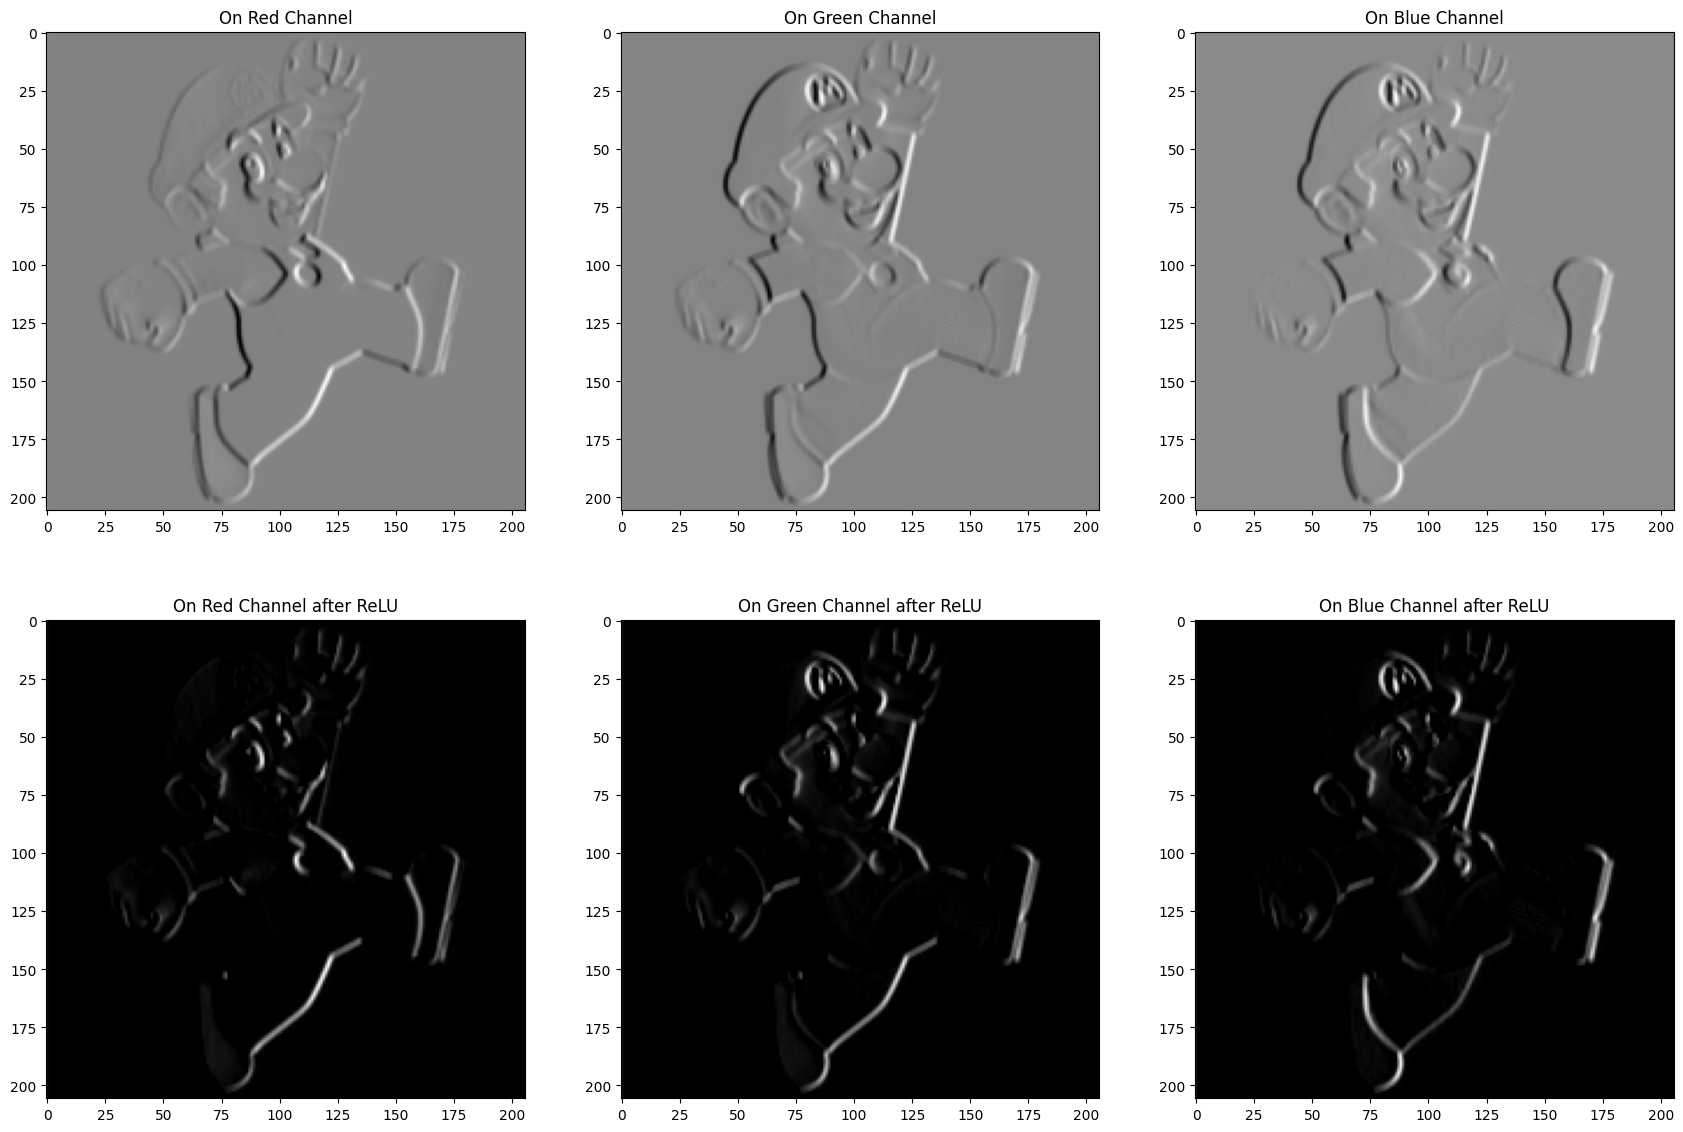

In [13]:
plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
plt.imshow(conv(img[:, :, 0], fltr2), cmap='gray');
plt.title('On Red Channel')

plt.subplot(2,3,2)
plt.imshow(conv(img[:, :, 1], fltr2), cmap='gray');
plt.title('On Green Channel')

plt.subplot(2,3,3)
plt.imshow(conv(img[:, :, 2], fltr2), cmap='gray');
plt.title('On Blue Channel');

# after ReLU
plt.subplot(2,3,4)
plt.imshow(ReLU(conv(img[:, :, 0], fltr2)), cmap='gray');
plt.title('On Red Channel after ReLU')

plt.subplot(2,3,5)
plt.imshow(ReLU(conv(img[:, :, 1], fltr2)), cmap='gray');
plt.title('On Green Channel after ReLU')

plt.subplot(2,3,6)
plt.imshow(ReLU(conv(img[:, :, 2], fltr2)), cmap='gray');
plt.title('On Blue Channel after ReLU');

Similarly applying vertical edge detectors

In [14]:
fltr3 = np.array([[1, 0, -1]]*3).T
fltr4 = np.array([[-1, 0, 1]]*3).T
print(fltr3)
print(fltr4)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


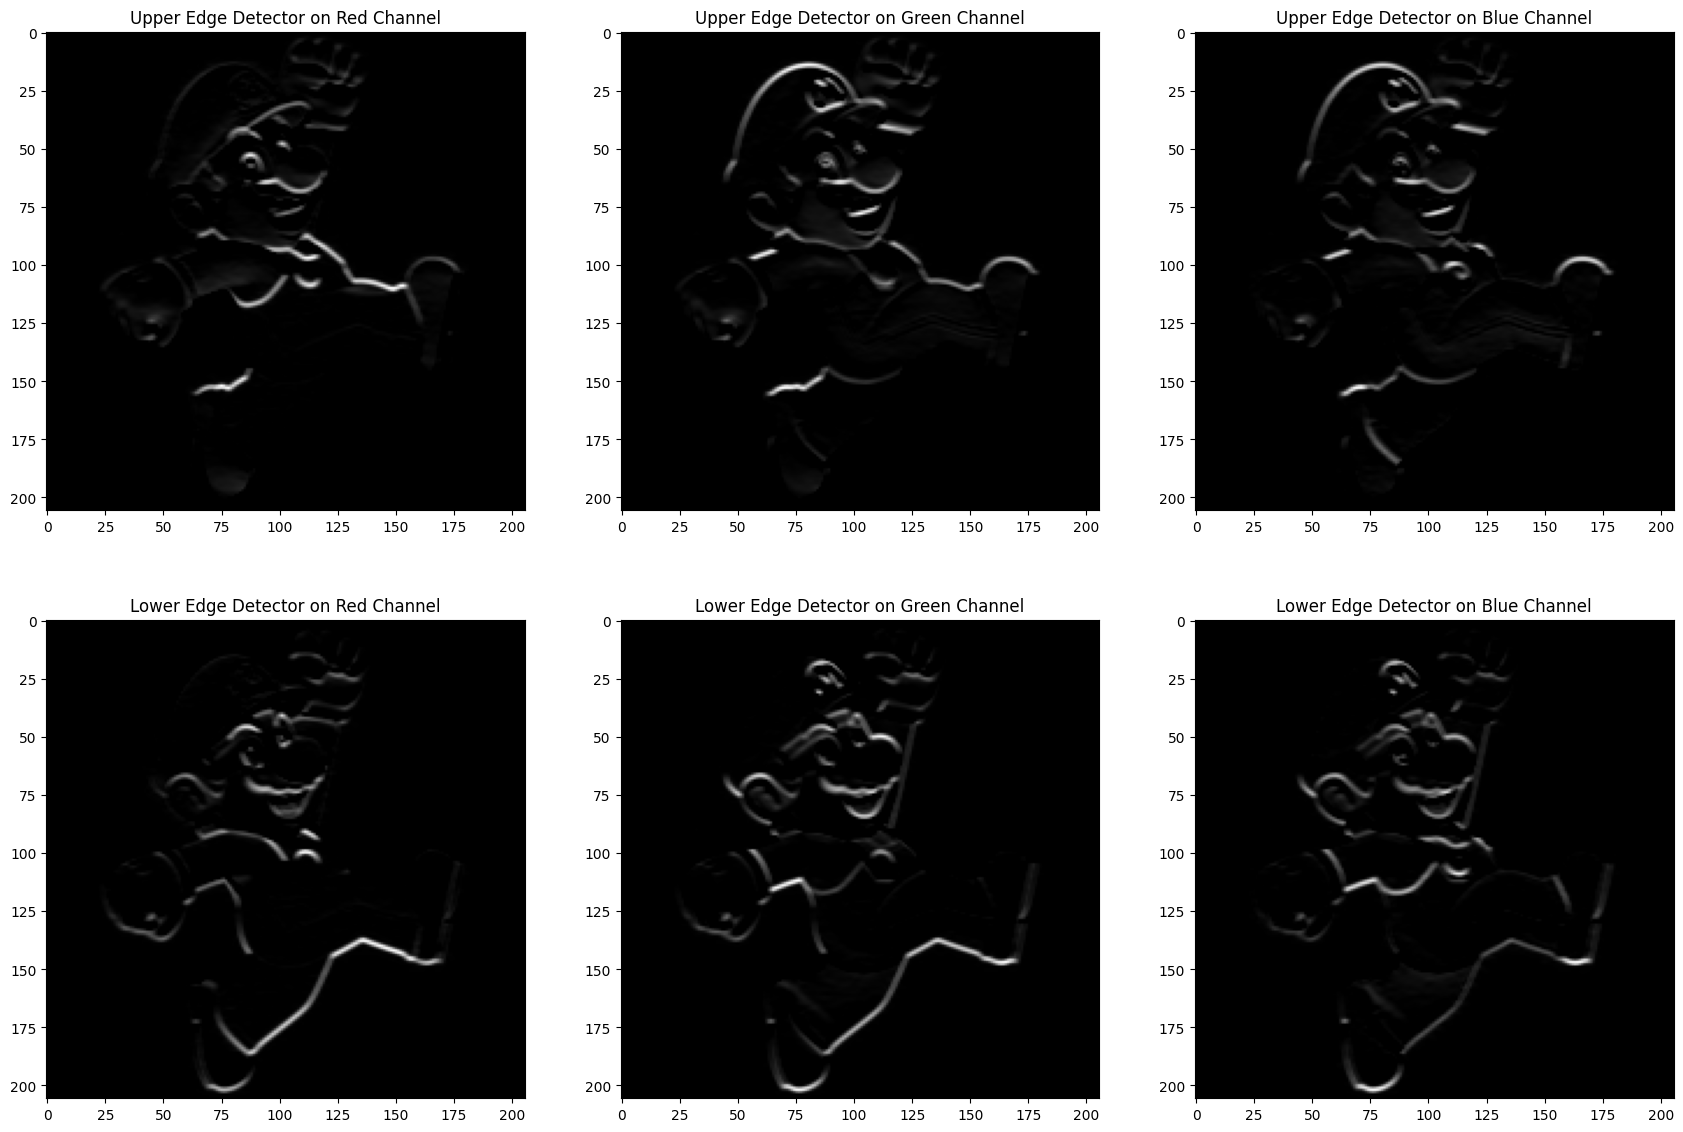

In [15]:
plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
plt.imshow(ReLU(conv(img[:, :, 0], fltr3)), cmap='gray');
plt.title('Upper Edge Detector on Red Channel')

plt.subplot(2,3,2)
plt.imshow(ReLU(conv(img[:, :, 1], fltr3)), cmap='gray');
plt.title('Upper Edge Detector on Green Channel')

plt.subplot(2,3,3)
plt.imshow(ReLU(conv(img[:, :, 2], fltr3)), cmap='gray');
plt.title('Upper Edge Detector on Blue Channel');

# after ReLU
plt.subplot(2,3,4)
plt.imshow(ReLU(conv(img[:, :, 0], fltr4)), cmap='gray');
plt.title('Lower Edge Detector on Red Channel')

plt.subplot(2,3,5)
plt.imshow(ReLU(conv(img[:, :, 1], fltr4)), cmap='gray');
plt.title('Lower Edge Detector on Green Channel')

plt.subplot(2,3,6)
plt.imshow(ReLU(conv(img[:, :, 2], fltr4)), cmap='gray');
plt.title('Lower Edge Detector on Blue Channel');

A Good way to visulaise the complete edges will be to add the result from the two vertical and two horizontal edge detectors

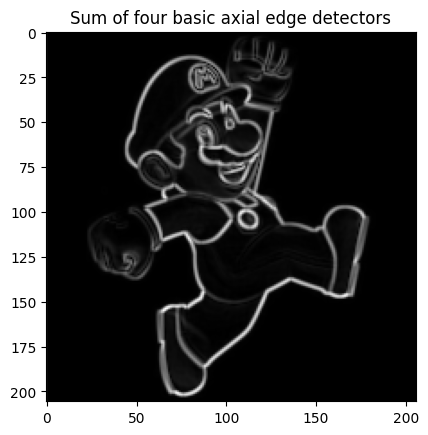

In [16]:
net = apply(img, fltr1)
net += apply(img, fltr2)
net += apply(img, fltr3)
net += apply(img, fltr4)
plt.imshow(net, cmap='gray');
plt.title('Sum of four basic axial edge detectors');

We can apply thresholding to fine the edges.

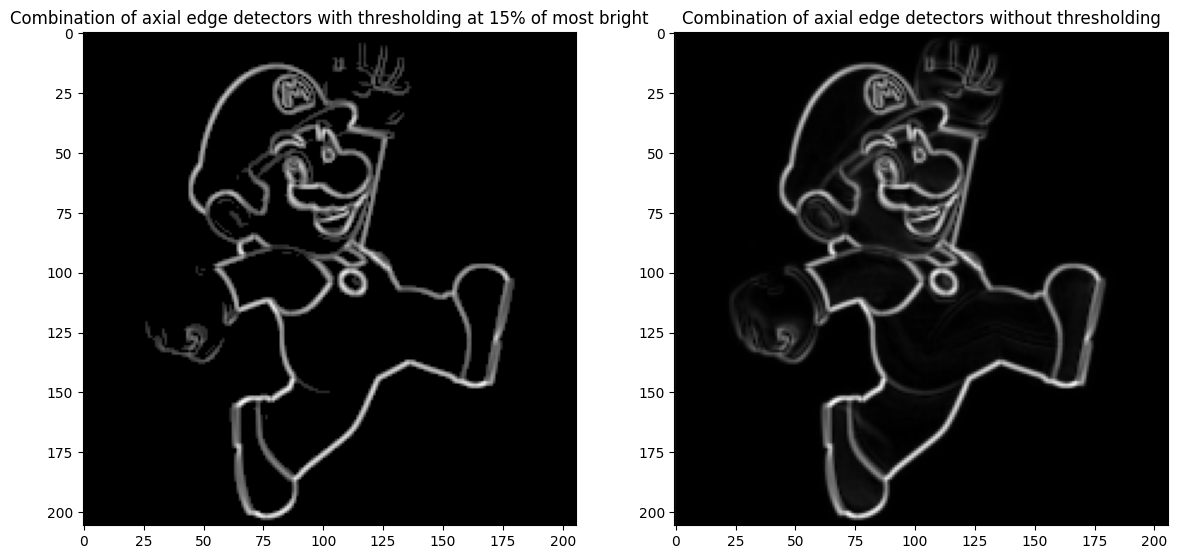

In [17]:
net = apply(img, fltr1)
net += apply(img, fltr2)

net += apply(img, fltr3)
net += apply(img, fltr4)

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(np.where(net > 0.15*(net.max()), net, 0), cmap = 'gray')
plt.title('Combination of axial edge detectors with thresholding at 15% of most bright');

plt.subplot(1,2,2)
plt.imshow(net, cmap = 'gray')
plt.title('Combination of axial edge detectors without thresholding');


### Sobel-Feldman Operator

In [19]:
Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Sy = Sx.T
print(Sx, Sy, sep='\n')

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


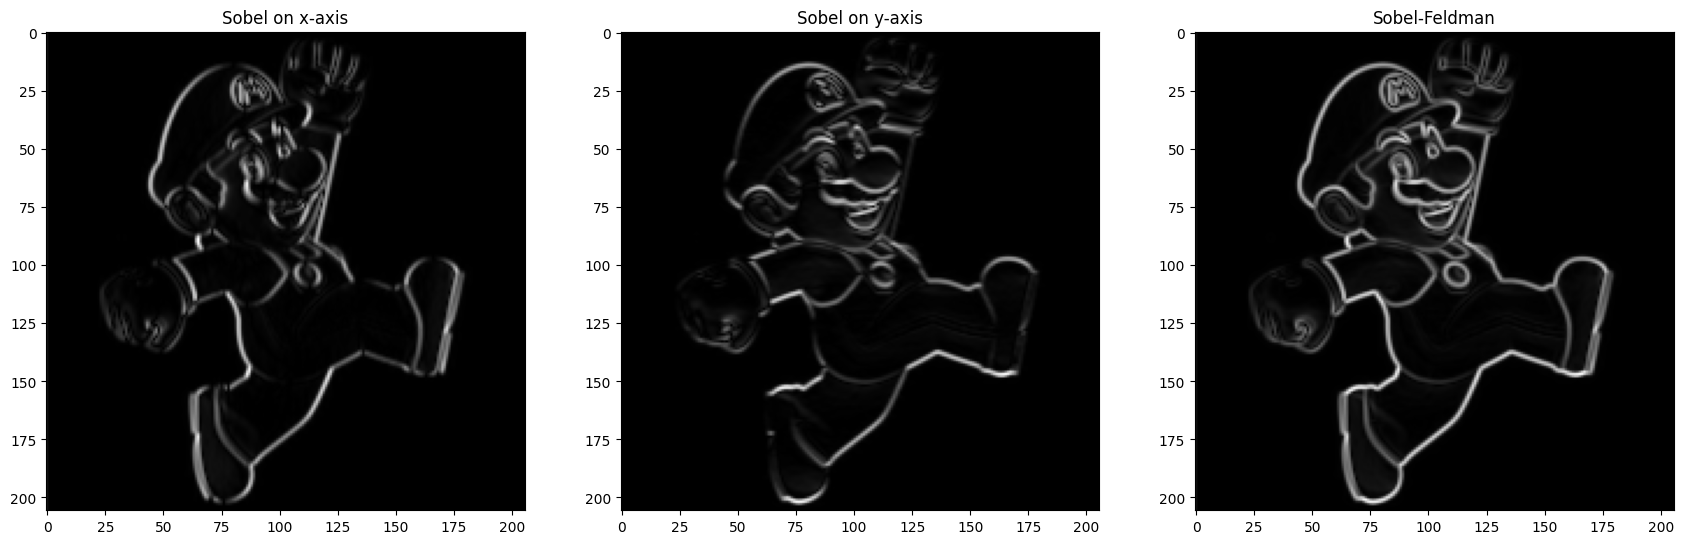

In [20]:
feat_map_x = np.sqrt(apply(img, Sx)**2 + apply(img, -Sx)**2)
feat_map_y = np.sqrt(apply(img, Sy)**2 + apply(img, -Sy)**2)
feat_map_sobel = np.sqrt((feat_map_x**2 + feat_map_y**2))

plt.figure(figsize=(21, 7))
plt.subplot(1,3,1)
plt.imshow(feat_map_x, cmap='gray')
plt.title('Sobel on x-axis')

plt.subplot(1,3,2)
plt.imshow(feat_map_y, cmap='gray')
plt.title('Sobel on y-axis')

plt.subplot(1,3,3)
plt.imshow(feat_map_sobel, cmap='gray')
plt.title('Sobel-Feldman');

### Robert Operator

In [21]:
Rx1 = np.array([[1,0,0],[0,0,0],[0,0,-1]])
Rx2 = -Rx1
Ry1 = np.array([[0,0,1],[0,0,0],[-1,0,0]])
Ry2 = -Ry1

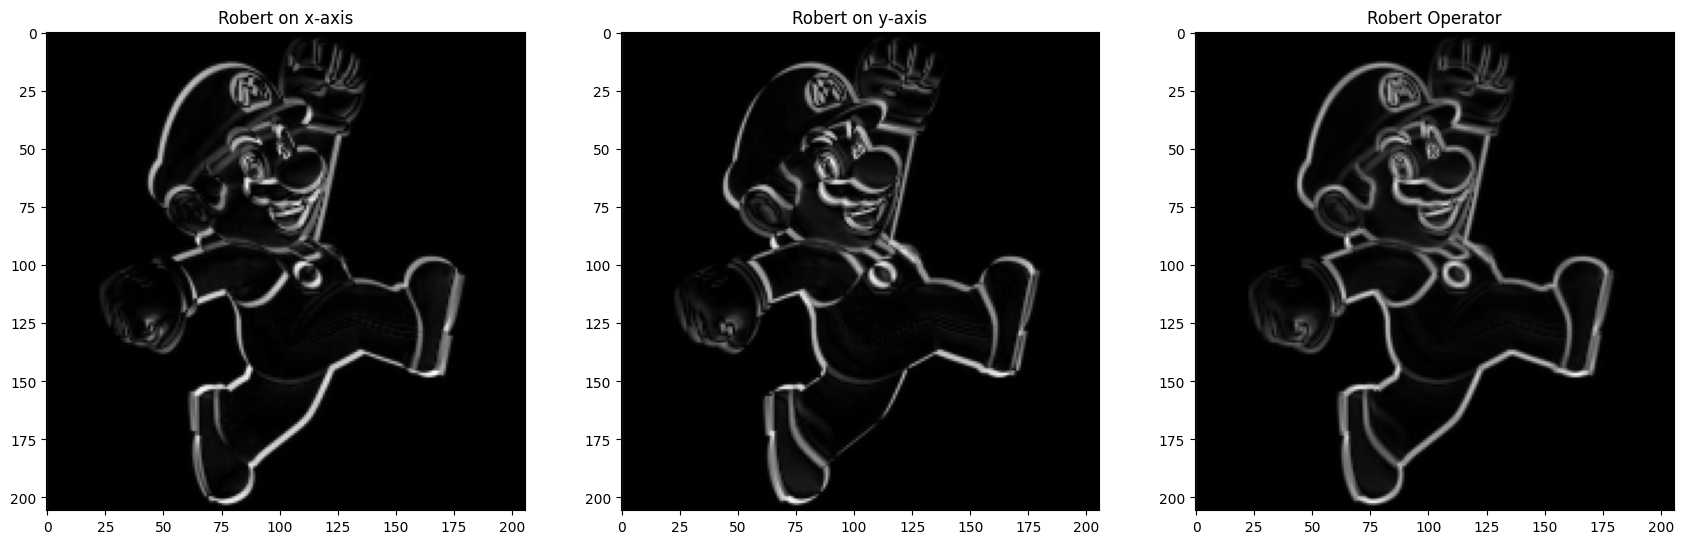

In [22]:
feat_map_Rx = apply(img, Rx1) + apply(img, Rx2)
feat_map_Ry = apply(img, Ry1) + apply(img, Ry2)
feat_map_Robert = np.sqrt(feat_map_Rx**2 + feat_map_Ry**2)

plt.figure(figsize=(21, 7))
plt.subplot(1,3,1)
plt.imshow(feat_map_Rx, cmap='gray')
plt.title('Robert on x-axis')

plt.subplot(1,3,2)
plt.imshow(feat_map_Ry, cmap='gray')
plt.title('Robert on y-axis')

plt.subplot(1,3,3)
plt.imshow(feat_map_Robert, cmap='gray')
plt.title('Robert Operator');

### User Input

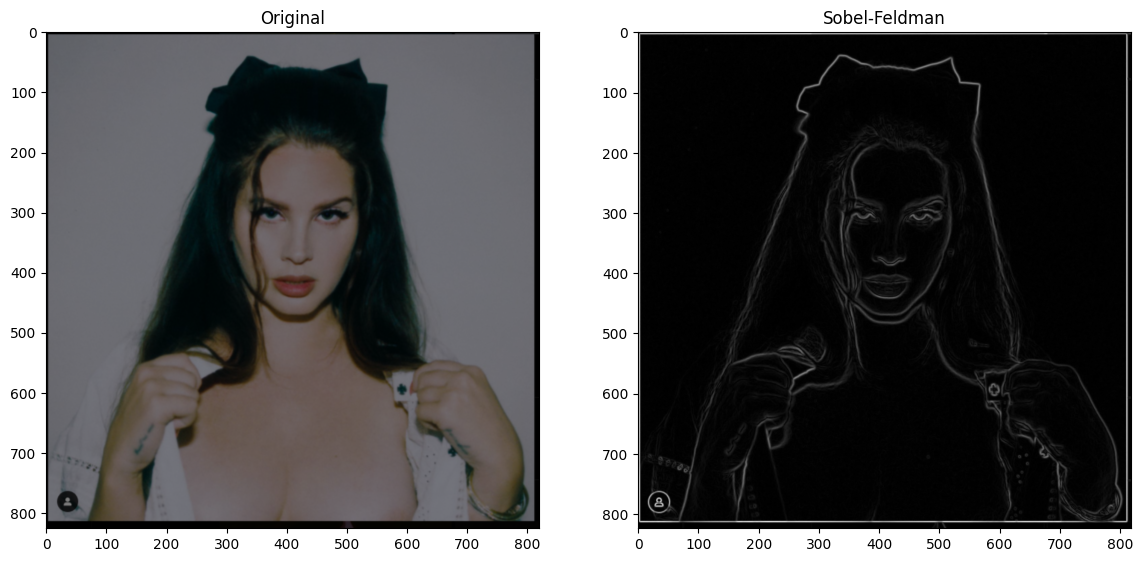

In [23]:
def ask_for_image():
    path = input('Give the path of png of file: ')
    path = path.replace('\\', '\\\\').strip('\'').strip('\"')
    try:
        image = plt.imread(path)
        return image
    except IOError:
        print("Please enter COMPLETE path to the IMAGE FILE.")
        return None

image = ask_for_image()

if image is not None:
    # making gaussian kernel of 3x3 with std=1
    H = make_gauss_kernel(1,1)
    image1 = conv(image[:,:,0],H)
    image2 = conv(image[:,:,1],H)
    image3 = conv(image[:,:,2],H)
    image1 = np.stack((image1,image2,image3),axis=-1)

    Sx1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Sx2 = -Sx1
    Sy1 = Sx1.T
    Sy2 = -Sy1
    # print(Sx, Sy, sep='\n')
    feat_map_x = np.sqrt(apply(image1, Sx1)**2 + apply(image1,Sx2)**2)
    feat_map_y = np.sqrt(apply(image1, Sy1)**2 + apply(image1,Sy2)**2)
    feat_map_sobel = np.sqrt((feat_map_x**2 + feat_map_y**2))

    plt.figure(figsize=(14, 7))
    plt.subplot(1,2,1)
    plt.imshow(image1)
    plt.title('Original')

    plt.subplot(1,2,2)
    plt.imshow(feat_map_sobel, cmap='gray')
    plt.title('Sobel-Feldman');